# Practica 6 : Regresion Lineal
### Rodrigo Antonio Martinez Macias

In [10]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('../Data-Treated/fixed_data_who_suicide.csv')

# Correcion de formato
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.year

# Utilizar la función unique() para obtener los países únicos y se transorma en un set
paises_unicos = set(df['country'].unique())

# Ordenar el conjunto alfabéticamente
paises_unicos = sorted(paises_unicos)

In [12]:
def linear_regression(df: pd.DataFrame, x:str, y: str, labelx, labely, title)->None:
  model= sm.OLS(df[y],sm.add_constant(df[x])).fit()
  print(model.summary())
  coef = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']
  y_mean = df[y].mean()
  
  df.plot(x=x, y=y, kind='scatter')
  plt.plot(df[x], [y_mean] * len(df), color='green', label=f'Mean {y}')
  plt.plot(df[x], coef.values[1] * df[x] + coef.values[0], color='red', label='Regression Line')
  plt.xlabel(labelx)
  plt.ylabel(labely)
  plt.title(title)
  plt.show()

## Regresion lineal de la sumatoria de los sucidios de todos los años, rangos y paises de los hombres

                            OLS Regression Results                            
Dep. Variable:      suicides_per_year   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     7.391
Date:                Fri, 24 Nov 2023   Prob (F-statistic):             0.0100
Time:                        13:33:39   Log-Likelihood:                -455.38
No. Observations:                  38   AIC:                             914.8
Df Residuals:                      36   BIC:                             918.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.036e+06   1.18e+06     -2.582      0.0

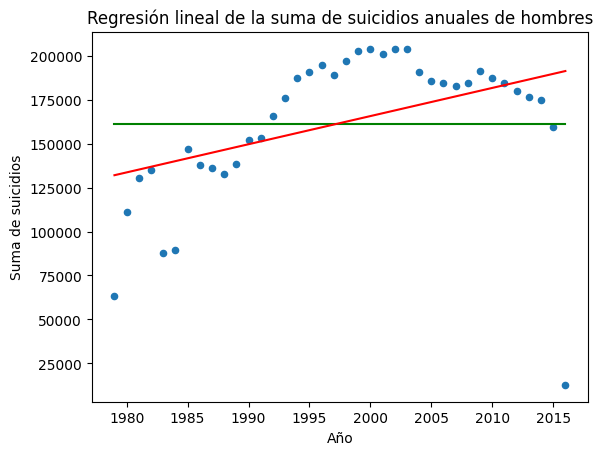

In [13]:
df_by_year = df.groupby(['sex', 'year']).agg(suicides_per_year=('suicides_no', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
df_by_year = df_by_year[df_by_year['sex'] == 'male']

linear_regression(df_by_year, "year", "suicides_per_year", "Año", "Suma de suicidios", "Regresión lineal de la suma de suicidios anuales de hombres")

## Regresion lineal de la sumatoria de los sucidios de todos los años, rangos y paises de las mujeres

                            OLS Regression Results                            
Dep. Variable:      suicides_per_year   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.011
Date:                Fri, 24 Nov 2023   Prob (F-statistic):              0.321
Time:                        13:33:39   Log-Likelihood:                -402.79
No. Observations:                  38   AIC:                             809.6
Df Residuals:                      36   BIC:                             812.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.464e+05   2.95e+05     -0.836      0.4

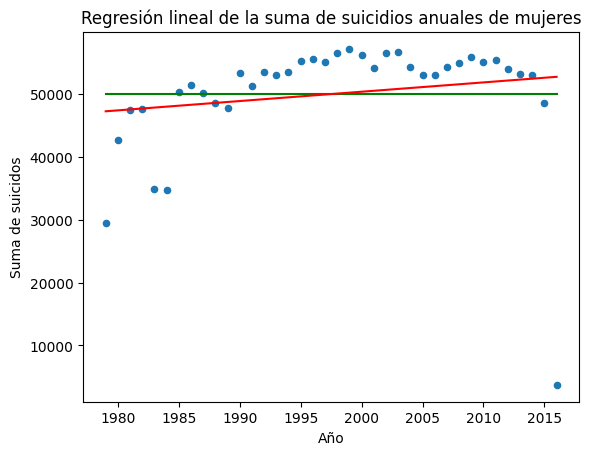

In [14]:
df_by_year = df.groupby(['sex', 'year']).agg(suicides_per_year=('suicides_no', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
df_by_year = df_by_year[df_by_year['sex'] == 'female']

linear_regression(df_by_year, "year", "suicides_per_year", "Año", "Suma de suicidos", "Regresión lineal de la suma de suicidios anuales de mujeres")

## Regresion lineal de la sumatoria de los sucidios de todos los años, rangos y paises

                            OLS Regression Results                            
Dep. Variable:     population_by_year   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     25.05
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.48e-05
Time:                        13:33:39   Log-Likelihood:                -792.23
No. Observations:                  38   AIC:                             1588.
Df Residuals:                      36   BIC:                             1592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.998e+10   8.32e+09     -4.804      0.0

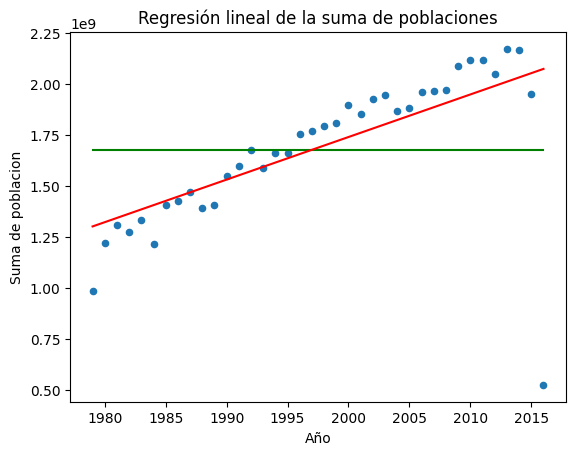

In [15]:
df_by_year = df.groupby('year').agg(population_by_year=('population', 'sum')).reset_index()
df_by_year.reset_index(inplace=True)
linear_regression(df_by_year, "year", "population_by_year", 
                  "Año", "Suma de poblacion", "Regresión lineal de la suma de poblaciones")